<ipython-input-1-4ba4caa7935a>:11: RuntimeWarning: divide by zero encountered in log
  log_term = np.log((sqrt_disc + z - rho) / (1 - rho))
<ipython-input-1-4ba4caa7935a>:14: RuntimeWarning: invalid value encountered in scalar divide
  return numerator/denominator
<ipython-input-1-4ba4caa7935a>:11: RuntimeWarning: invalid value encountered in log
  log_term = np.log((sqrt_disc + z - rho) / (1 - rho))


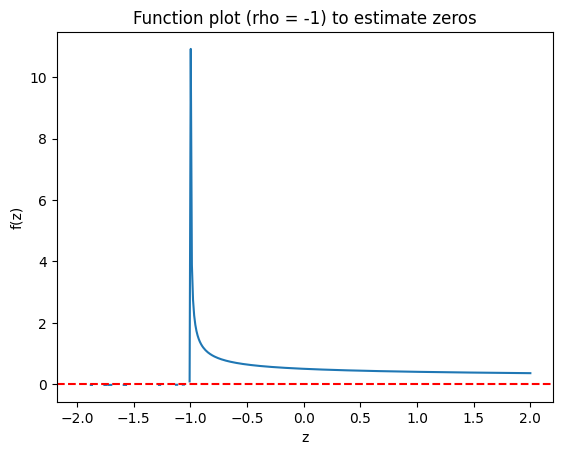

Zero near guess -1: -1.0
Zero near guess 0: 0.0
Zero near guess 1: 4.351754566257766e+120
Zero near guess 2: 6.989775649292136e+120


<ipython-input-1-4ba4caa7935a>:35: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  root = fsolve(f, guess, args=(rho_value,))
<ipython-input-1-4ba4caa7935a>:14: RuntimeWarning: invalid value encountered in divide
  return numerator/denominator
<ipython-input-1-4ba4caa7935a>:35: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  root = fsolve(f, guess, args=(rho_value,))


In [ ]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Define the function
def f(z, rho=0):
    discriminant = 1 - 2 * rho * z + z ** 2
    if discriminant <= 0 or (1 - rho) == 0:
        return np.nan
    sqrt_disc = np.sqrt(discriminant)
    log_term = np.log((sqrt_disc + z - rho) / (1 - rho))
    numerator = log_term - (z / sqrt_disc)
    denominator = log_term**2
    return numerator/denominator

# Vectorize for plotting
f_vec = np.vectorize(f)

# Plot to estimate zeros
z_vals = np.linspace(-2, 2, 400)
rho_value = -1  # Example rho value
y_vals = f_vec(z_vals, rho=rho_value)

plt.plot(z_vals, y_vals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.title(f'Function plot (rho = {rho_value}) to estimate zeros')
plt.show()

# Use fsolve with initial guesses
initial_guesses = [-1, 0, 1, 2]
for guess in initial_guesses:
    try:
        root = fsolve(f, guess, args=(rho_value,))
        print(f"Zero near guess {guess}: {root[0]}")
    except Exception as e:
        print(f"Failed near guess {guess}: {e}")


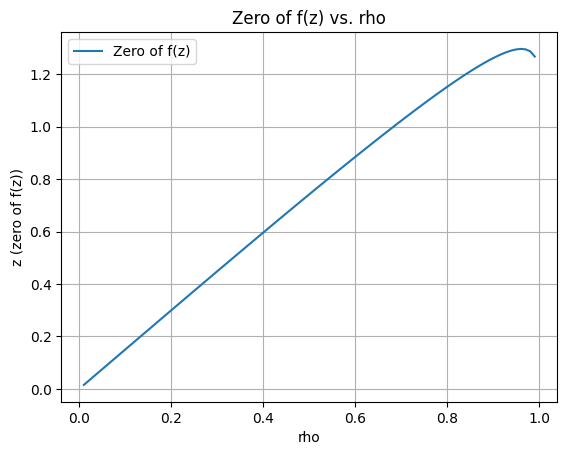

In [ ]:
# Range of rho values
rho_values = np.linspace(0.01, 0.99, 100)  # Avoid rho=1 to prevent division by zero
zero_positions = []

# Use a consistent initial guess for zero search
initial_guess = 1.0

for rho in rho_values:
    try:
        root = fsolve(f, initial_guess, args=(rho,))
        zero_positions.append(root[0])
    except Exception:
        zero_positions.append(np.nan)

# Plotting zero position as a function of rho
plt.plot(rho_values, zero_positions, label='Zero of f(z)')
plt.xlabel('rho')
plt.ylabel('z (zero of f(z))')
plt.title('Zero of f(z) vs. rho')
plt.grid(True)
plt.legend()
plt.show()

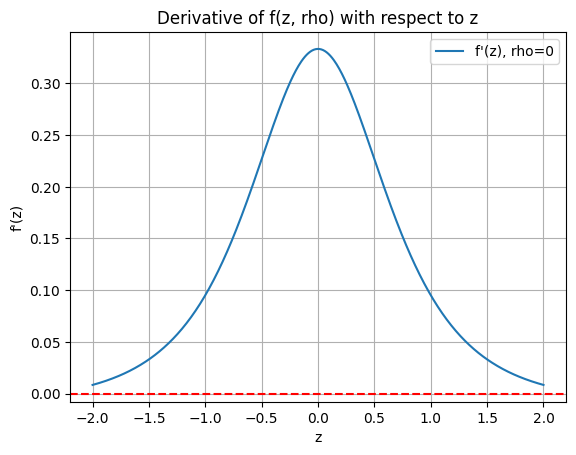

In [ ]:
def f_derivative(z, rho=0.7):
    D = 1 - 2 * rho * z + z ** 2
    if np.any(D <= 0) or (1 - rho) == 0:
        return np.nan

    sqrt_D = np.sqrt(D)
    A = sqrt_D + z - rho
    if np.any(A <= 0):
        return np.nan

    L = np.log(A / (1 - rho))

    # u = L - z / sqrt_D
    # v = L^2
    u = L - z / sqrt_D
    v = L ** 2

    # du/dz
    dL_dz = (1 / (sqrt_D + z - rho)) * ((z - rho) / sqrt_D + 1)
    dz_over_sqrtD_dz = (D + z * (rho - z)) / (D * sqrt_D)
    du_dz = dL_dz - dz_over_sqrtD_dz

    # dv/dz = 2L * dL/dz
    dv_dz = 2 * L * dL_dz

    # Apply quotient rule
    numerator = du_dz * v - u * dv_dz
    denominator = v ** 2

    return numerator / denominator

# Vectorized for plotting
f_derivative_vec = np.vectorize(f_derivative)

# Range of z values
z_vals = np.linspace(-2, 2, 500)
rho_value = 0  # You can change this

# Compute derivative values
df_vals = f_derivative_vec(z_vals, rho=rho_value)

# Plotting
plt.plot(z_vals, df_vals, label=f"f'(z), rho={rho_value}")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('z')
plt.ylabel("f'(z)")
plt.title("Derivative of f(z, rho) with respect to z")
plt.grid(True)
plt.legend()
plt.show()


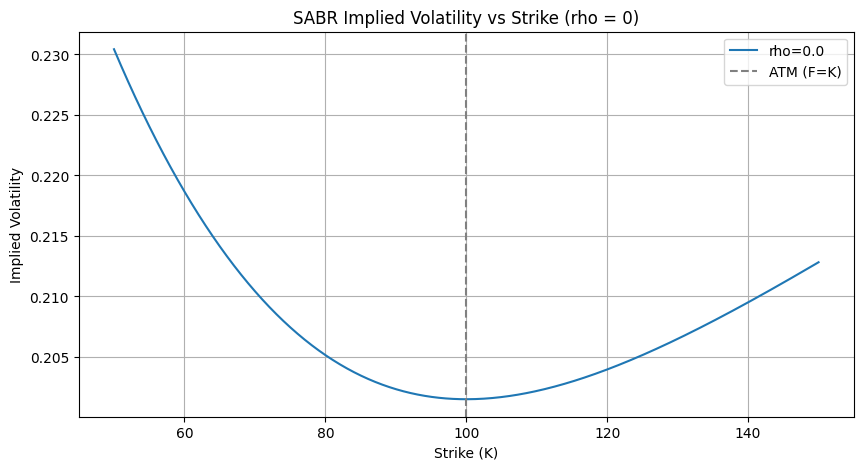

In [ ]:
# So indeed z=0 (k=0, K=F) is a minimum when rho=0

import numpy as np
import matplotlib.pyplot as plt

def SABR_calibration(K, alpha, rho, sigma0, T, F):
    epsilon = 1e-8
    z = (alpha * np.log(F / K)) / sigma0
    x = np.log((np.sqrt(1 - 2 * rho * z + z ** 2) + z - rho) / (1 - rho))
    atm_mask = np.isclose(F, K)
    safe_x = np.where(np.abs(x) < epsilon, epsilon, x)
    vol_factor = 1 + 0.25 * T * (alpha * rho * sigma0 + ((alpha ** 2) / 2) * ((2 / 3) - rho ** 2))
    vol = np.where(atm_mask, sigma0, sigma0 * (z / safe_x) * vol_factor)
    return vol

# Parameters
alpha = 0.3
rho = 0.0
sigma0 = 0.2
T = 1.0
F = 100.0

# Strike range
K_vals = np.linspace(50, 150, 500)
vols = SABR_calibration(K_vals, alpha, rho, sigma0, T, F)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(K_vals, vols, label=f"rho={rho}")
plt.axvline(F, color='gray', linestyle='--', label='ATM (F=K)')
plt.xlabel("Strike (K)")
plt.ylabel("Implied Volatility")
plt.title("SABR Implied Volatility vs Strike (rho = 0)")
plt.grid(True)
plt.legend()
plt.show()
